In [2]:
import pandas as pd

df = pd.read_csv("../data/scale_dataset.csv")
print("--- New dataset 'scale_dataset.csv' loaded successfully. ---")


df = df.drop('customerID', axis=1)
print("--- 'customerID' column dropped. ---")

print("\n--- First 5 rows of the new dataset ---")
print(df.head())


--- New dataset 'scale_dataset.csv' loaded successfully. ---
--- 'customerID' column dropped. ---

--- First 5 rows of the new dataset ---
   gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
0       0              0        1           0 -1.277445             0   
1       1              0        0           0  0.066327             1   
2       1              0        0           0 -1.236724             1   
3       1              0        0           0  0.514251             0   
4       0              0        0           0 -1.236724             1   

   PaperlessBilling  MonthlyCharges  TotalCharges  Churn  ...  \
0                 1       -1.160323     -0.992611      0  ...   
1                 0       -0.259629     -0.172165      0  ...   
2                 1       -0.362660     -0.958066      1  ...   
3                 0       -0.746535     -0.193672      0  ...   
4                 1        0.197365     -0.938874      1  ...   

   TechSupport_Yes  StreamingTV


--- Generating correlation heatmap to find redundant features... ---


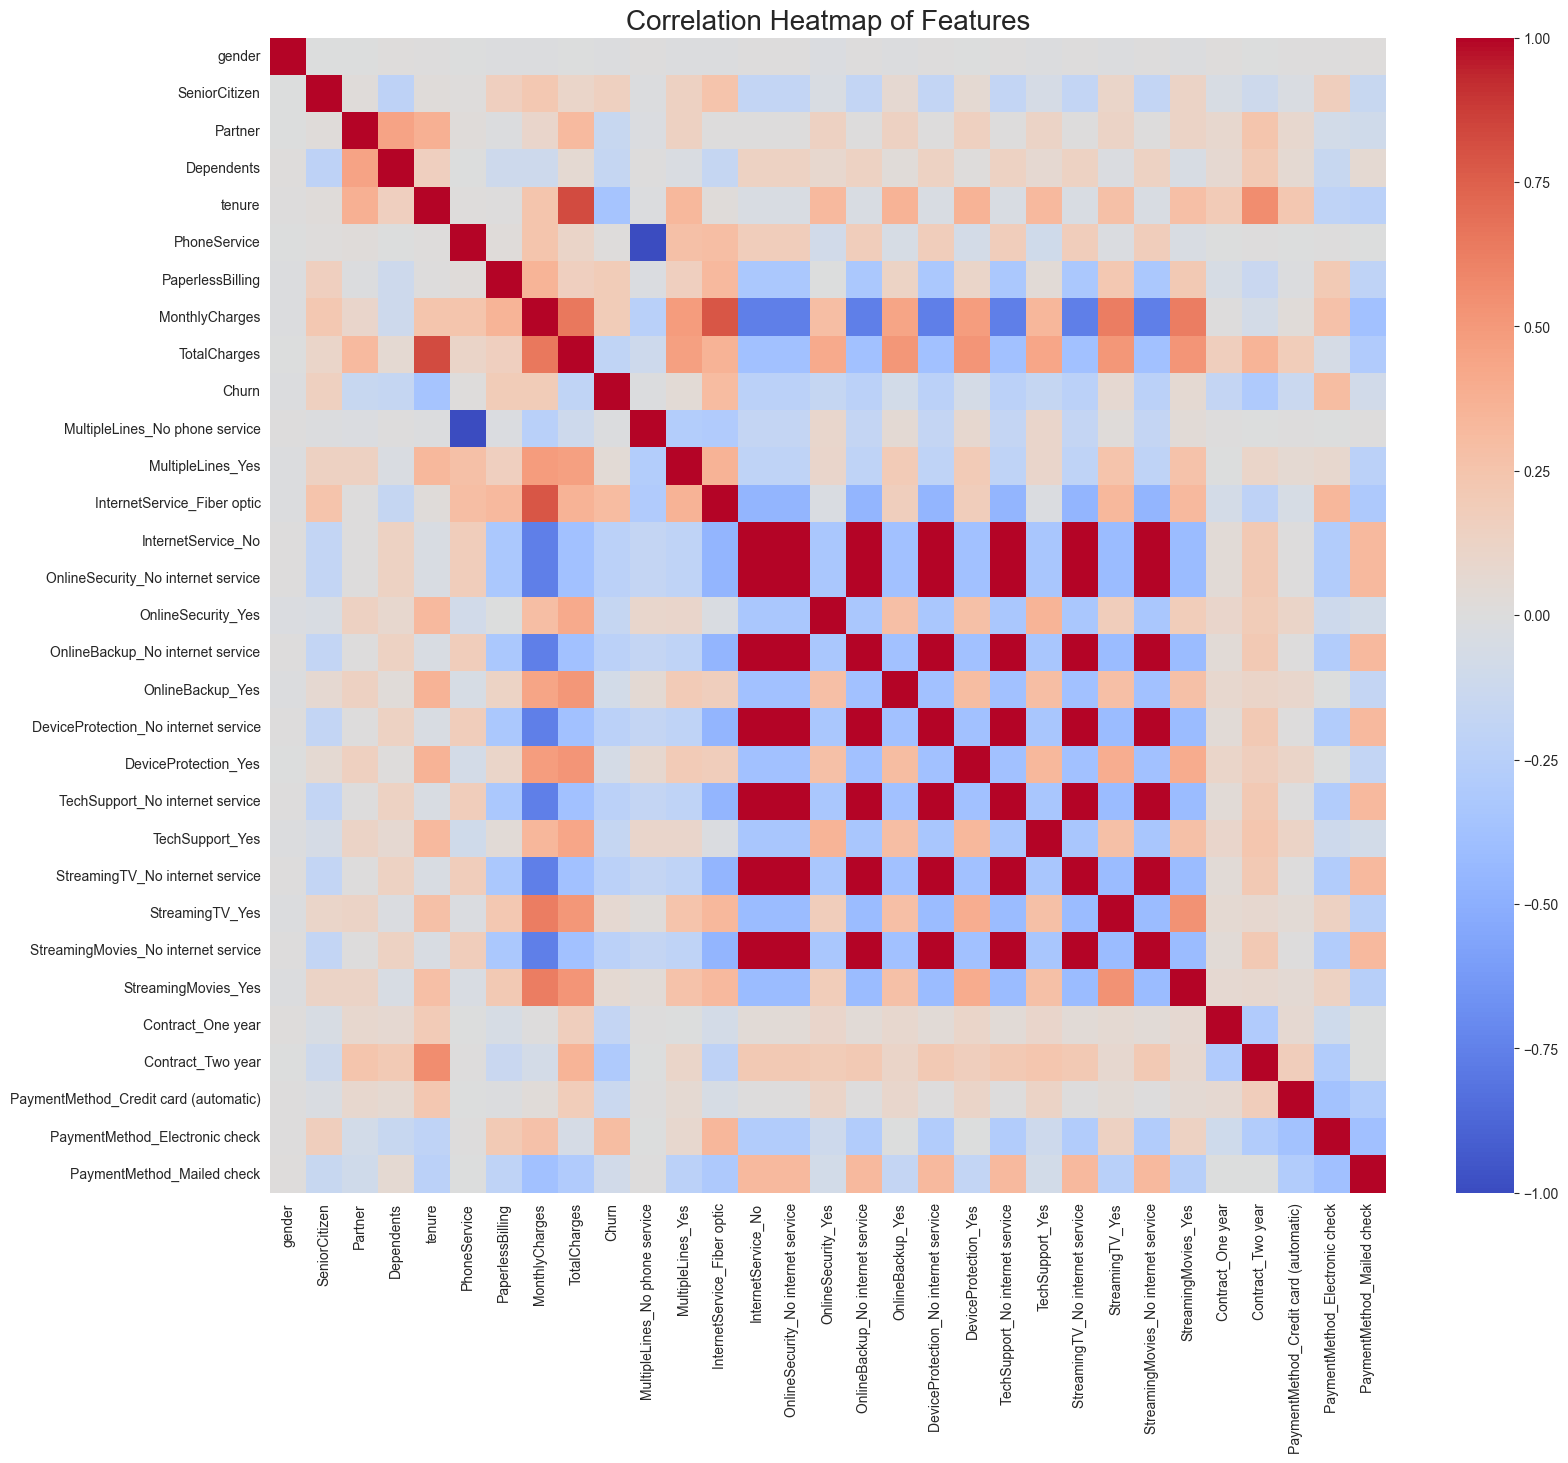

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generate Correlation Heatmap ---
print("\n--- Generating correlation heatmap to find redundant features... ---")
plt.figure(figsize=(18, 15))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title('Correlation Heatmap of Features', fontsize=20)

plt.savefig('../results/eda_visualizations/IT24101325/totalcharges_distribution9.png',
            dpi=300, bbox_inches='tight')
plt.show()
plt.close()

In [6]:
# --- Drop the redundant feature based on the heatmap analysis ---
df_selected = df.drop('TotalCharges', axis=1)
print("\n--- 'TotalCharges' feature removed. ---")
print("Shape of DataFrame after dropping feature:", df_selected.shape)


--- 'TotalCharges' feature removed. ---
Shape of DataFrame after dropping feature: (7043, 30)



--- Calculating correlation of remaining features with 'Churn'... ---


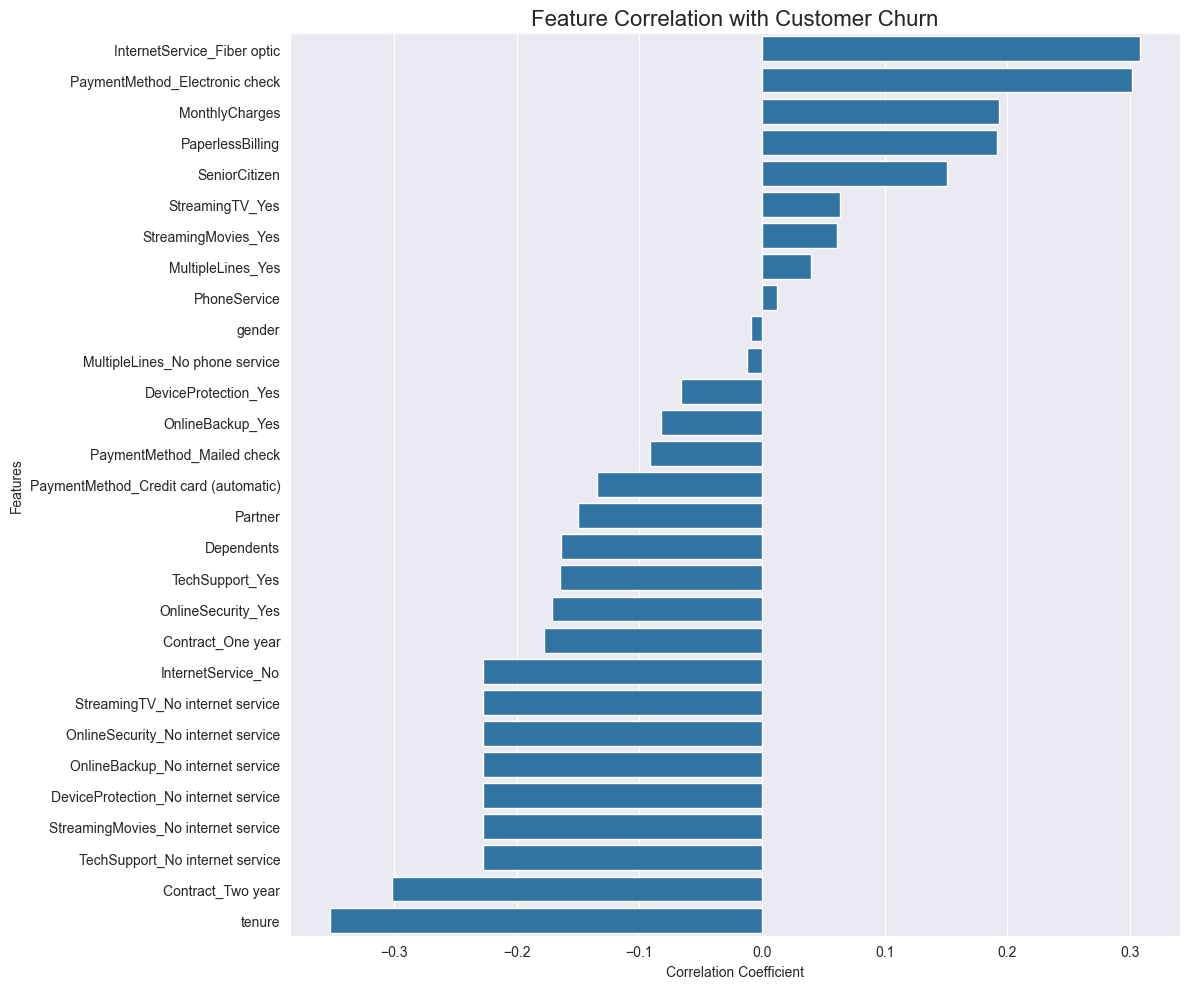


--- Final ranking of features by correlation with Churn: ---
InternetService_Fiber optic              0.308020
PaymentMethod_Electronic check           0.301919
MonthlyCharges                           0.193356
PaperlessBilling                         0.191825
SeniorCitizen                            0.150889
StreamingTV_Yes                          0.063228
StreamingMovies_Yes                      0.061382
MultipleLines_Yes                        0.040102
PhoneService                             0.011942
gender                                  -0.008612
MultipleLines_No phone service          -0.011942
DeviceProtection_Yes                    -0.066160
OnlineBackup_Yes                        -0.082255
PaymentMethod_Mailed check              -0.091683
PaymentMethod_Credit card (automatic)   -0.134302
Partner                                 -0.150448
Dependents                              -0.164221
TechSupport_Yes                         -0.164674
OnlineSecurity_Yes                    

In [17]:

# Calculate and Plot Correlation with Churn
print("\n--- Calculating correlation of remaining features with 'Churn'... ---")
plt.figure(figsize=(12, 10))

# Calculate correlation with 'Churn' and sort the values
churn_correlation = df_selected.corr()['Churn'].sort_values(ascending=False)

# Create the bar plot
sns.barplot(x=churn_correlation.drop('Churn'), y=churn_correlation.drop('Churn').index, orient='h')

plt.title('Feature Correlation with Customer Churn', fontsize=16)
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.tight_layout()

plt.savefig('../results/eda_visualizations/IT24101325/totalcharges_distribution10.png',
            dpi=300, bbox_inches='tight')
plt.show()
plt.close()

# Display the final correlation values
print("\n--- Final ranking of features by correlation with Churn: ---")
print(churn_correlation.drop('Churn'))

In [12]:

df_final = df_selected

output_filename = '../data/selected_features_dataset.csv'

df_final.to_csv(output_filename, index=False)

print(f"✅ Final dataset with selected features successfully saved as '{output_filename}'")

✅ Final dataset with selected features successfully saved as 'selected_features_dataset.csv'


In [15]:
drive_path = '/data/data.selected_features_dataset.csv'
df_final.to_csv(drive_path, index=False)

print(f"✅ Final dataset successfully saved to your Google Drive at: {drive_path}")

✅ Final dataset successfully saved to your Google Drive at: C:/Users/ASUS TUF/PycharmProjects/2025-Y2-S1-MLB-B6G2-07/data.selected_features_dataset.csv
